In [1]:
import pandas as pd
from utils.soup import getSoup
import matplotlib.pyplot as plt

In [2]:
page = 'https://www.bls.gov/charts/consumer-price-index/consumer-price-index-average-price-data.htm'
data = getSoup(page)

In [10]:
table = data.find('table', class_='regular')

In [11]:
columns = [x.text for x in data.find_all(class_='stubhead')]

di = {x.text: [] for x in data.find_all(class_='stubhead')}
for row in data.tbody.find_all('tr'):
    header = row.find('th')

    month = header.text.strip()
    di[columns[0]].append(month)

    entry = row.find_all('td')
    
    for ind, col in enumerate(columns[1:]):
        #float(entry[ind].text.strip())
        di[col].append(entry[ind].text.strip())

df2 = pd.DataFrame(di)

#df = df2.set_index('Month')
df2 = df2.replace({'June' : 'Jun', 'July' : 'Jul', 'Sept' : 'Sep'}, regex=True)
df2['Month'] = pd.to_datetime(df2['Month'], format='%b %Y')
df2.head()

AttributeError: 'NoneType' object has no attribute 'find_all'

In [12]:
df2.groupby('Month')['Eggs, grade A, large, per doz.'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Price per doz.')
plt.title('Price of Eggs over Time')

NameError: name 'df2' is not defined

Text(0.5, 1.0, 'Price of Bananas over Time')

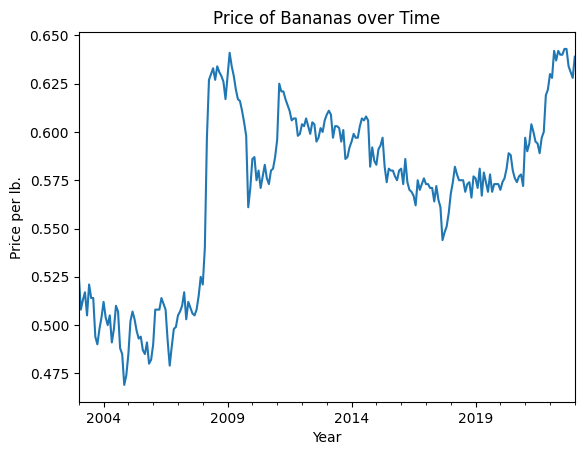

In [7]:
df2.groupby('Month')['Bananas, per lb.'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Price per lb.')
plt.title('Price of Bananas over Time')